# **Esercizio 1**

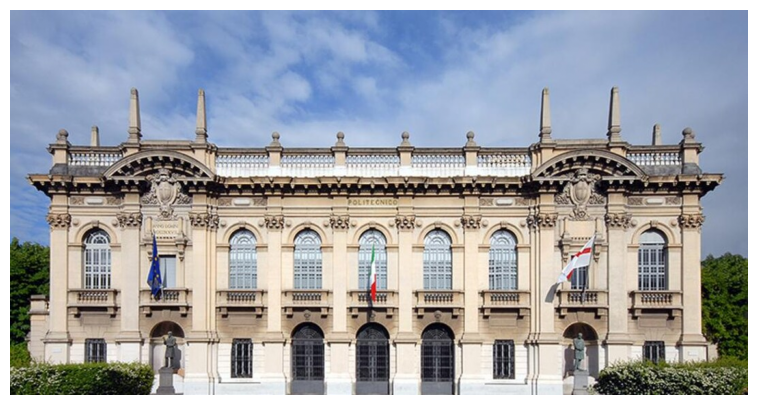

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
image_path = 'sample_data/polimi_compress.jpg'
img = imread(image_path)
img_RGB = [np.array(img[:,:,i], dtype = np.float64)/255 for i in range(3)]
def plot_image(RGB, ax = None):
  if ax is None:
    _, ax = plt.subplots(1,1, figsize = (12,5))
  ax.imshow(np.clip(np.stack(RGB, axis = 2),0,1))
  plt.axis('off')
plot_image(img_RGB)


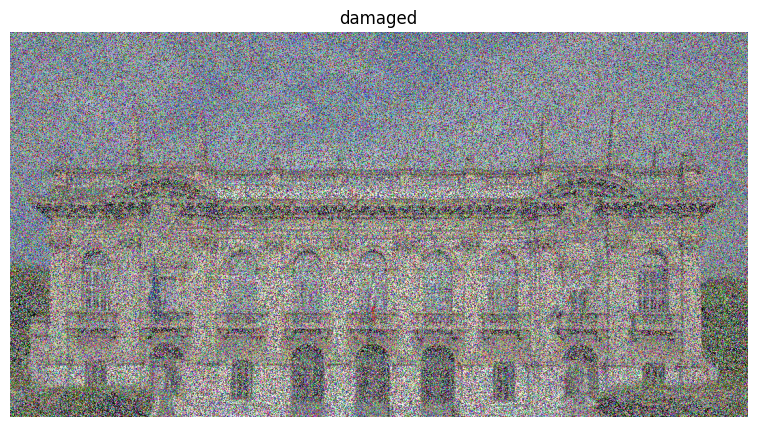

In [ ]:
#Randomly replace 70% of pixels with random colors
damage_fraction = 0.7
np.random.seed(0)


mask_remove = np.random.choice(a=[True, False], size=(img.shape[0], img.shape[1]), p=[damage_fraction, 1 - damage_fraction])
mask_keep = np.logical_not(mask_remove)

img_damaged_RGB = [img_RGB[i].copy() for i in range(3)]
for i in range(3):
  img_damaged_RGB[i][mask_remove] = np.random.rand(np.sum(mask_remove))

# Display the damaged image
plot_image(img_damaged_RGB)
plt.title("damaged")
plt.show()



In [ ]:
from scipy.stats import pearsonr
import math
def SVT(img_damaged, img_original, n_max_iter=20, threshold=100.0, increment_tol=1e-6): #note: n_max_iteration should be big (100+) but it take too much time to iterate otherwise
    RMSE_list = list()
    rho_list = list()

    A = img_damaged.copy()

    for i in range(n_max_iter):
        A_old = A.copy()
        U,s,VT = np.linalg.svd(A, full_matrices = False)

        s[s < threshold] = 0
        A = U @ np.diag(s) @ VT

        A[mask_keep] = img_original[mask_keep]
        increment = np.linalg.norm(A - A_old)

        vals_predicted = A[mask_remove]
        errors = img_original[mask_remove] - vals_predicted

        RMSE_list.append(np.sqrt(np.mean(errors**2)))
        rho_list.append(pearsonr(img_original[mask_remove],vals_predicted)[0])

        # print('=============== Iteration %d - increment norm %1.3e' % (i+1, increment))
        # print('RMSE: %1.3f' % RMSE_list[-1])
        # print('rho:  %1.3f' % rho_list[-1])
        if increment < increment_tol:
            break
    return A, RMSE_list, rho_list

def SVT_RGB(img_damaged, img_original, threshold=100.0):
    reconstruction = []
    rmse = {}
    rho = {}

    r, rmse_list, rho_list = SVT(img_damaged_RGB[0], img_RGB[0], threshold=threshold)
    reconstruction.append(r)
    rmse['r'] = rmse_list
    rho['r'] = rho_list

    r, rmse_list, rho_list = SVT(img_damaged_RGB[1], img_RGB[1], threshold=threshold)
    reconstruction.append(r)
    rmse['g'] = rmse_list
    rho['g'] = rho_list

    r, rmse_list, rho_list = SVT(img_damaged_RGB[2], img_RGB[2], threshold=threshold)
    reconstruction.append(r)
    rmse['b'] = rmse_list
    rho['b'] = rho_list

    return reconstruction, rmse, rho

In [ ]:
starting_threshold = 0.625
iteration_num = 10
iteration = 0
def plot_pretty(axs, iteration, img_damaged_RGB, r, rmse, rho, th):
    axs[iteration][0].imshow(np.clip(np.stack(img_damaged_RGB, axis = -1),0,1))
    axs[iteration][1].imshow(np.clip(np.stack(r, axis = -1),0,1))
    axs[iteration][1].set_title(f'th ={th}')
    axs[iteration][0].axis('off')
    axs[iteration][1].axis('off')

    for el in rmse:
        if len(rmse[el])==1:
            rmse[el] += rmse[el]
    axs[iteration][2].semilogy(rmse['r'], color='red')
    axs[iteration][2].semilogy(rmse['g'], color='green')
    axs[iteration][2].semilogy(rmse['b'], color='blue')
    axs[iteration][2].set_title(f'rmse for th ={th}')
    for el in rho:
        if len(rho[el])==1:
            rho[el] += rho[el]
    axs[iteration][3].semilogy(rho['r'], color='red')
    axs[iteration][3].semilogy(rho['g'], color='green')
    axs[iteration][3].semilogy(rho['b'], color='blue')
    axs[iteration][3].set_title(f'rho for th ={th}')

fig, axs = plt.subplots(nrows=iteration_num, ncols=4, figsize=(30,60))


cur_threshold = starting_threshold
best_k = -1
best_rho = 0

for i in range(0, iteration_num):
    r, rmse, rho = SVT_RGB(img_damaged_RGB, img_RGB, threshold=cur_threshold)
    plot_pretty(axs, i, img_damaged_RGB, r, rmse, rho, cur_threshold)
    if best_k == -1:
        best_k = cur_threshold
        best_rho = cur_threshold
    elif best_rho < (rho['g'][-1] + rho['r'][-1] + rho['b'][-1])/3:
        if not(math.isnan(rho['g'][-1])) and not(math.isnan(rho['r'][-1])) and not(math.isnan(rho['b'][-1])):
            best_k = cur_threshold
            best_mse = (rho['g'][-1] + rho['r'][-1] + rho['b'][-1])/3
    cur_threshold *= 2

print('\n\n__BEST RHO:', best_rho, 'OBTAINED FOR threshold =', best_k, '__')

Output hidden; open in https://colab.research.google.com to view.

# Esercizio 2

A perceptron is a type of artificial neuron that serves as the basic building block in neural networks. It takes multiple binary inputs (0 or 1), applies weights to these inputs, and produces a binary output (0 or 1). The perceptron's output is determined by the weighted sum of its inputs passed through an activation function.

1. **Inputs**: The perceptron receives multiple binary inputs, denoted as x₁, x₂, ..., xn. Each input is multiplied by a corresponding weight (w₁, w₂, ..., wn).

2. **Weighted Sum**: The weighted sum (z) is calculated by taking the sum of the products of inputs and weights:
    z = w1*x1 + ... +...+ wn∗xn + b
3. **Activation Function**: The weighted sum is then passed through an activation function (often a step function or a sigmoid function). The purpose of the activation function is to introduce non-linearity and determine the output of the perceptron. The output (y) is usually binary: 0 or 1.
To optimize the parameters (weights) of the perceptron, we use the gradient descent method. The goal is to minimize a cost function that measures the error between the predicted output and the actual output. The steps involved are:


*   Define a Cost Function, measuring the difference between the predicted output and actual output. A common choice for binary classification is mean squared error (MSE) or cross-entropy loss.
*   Compute the Gradient, calculating the gradient of the cost function with respect to each weight.
*   Update weights
*   Repeat

## **POINT 1**

In a perceptron, a hyperplane is defined by the equation:

z = w1*x1 + w2*x2 + b

with (x1,x2) as input features, (w1,w2) as weights associated with these features, and b the bias term.

The output of the perceptron is determined by the sign of the weighted sum passed through an activation function (commonly a step function or a sigmoid function).


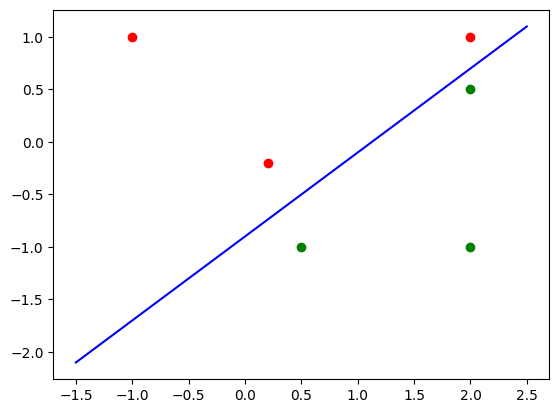

In [ ]:
x = [(2,-1), (-1, 1), (2, 0.5), (0.2, -0.2), (0.5, -1), (2, 1)]
y = [1, 0, 1, 0, 1, 0]
x1_true = []
x2_true = []
x1_false = []
x2_false = []

for i in range(len(x)):
    if y[i]:
        x1_true.append(x[i][0])
        x2_true.append(x[i][1])
    else:
        x1_false.append(x[i][0])
        x2_false.append(x[i][1])


plt.scatter(x1_true, x2_true, c='green')
plt.scatter(x1_false, x2_false, c='red')

def iperplane(x1):
    return 0.8*x1 - 0.9

x_range = np.linspace(-1.5, 2.5, 100)
plt.plot(x_range, iperplane(x_range), color='blue')
plt.plot()
plt.show()


## POINT 2
Implement and apply the perceptron algorithm using w0 = (1, 0) and b0 = 0. Consider a learning rate η = 2.
Draw on a figure the obtained hyperplane along with the data.


0 loss found in  6  iterations
loss =  0.0


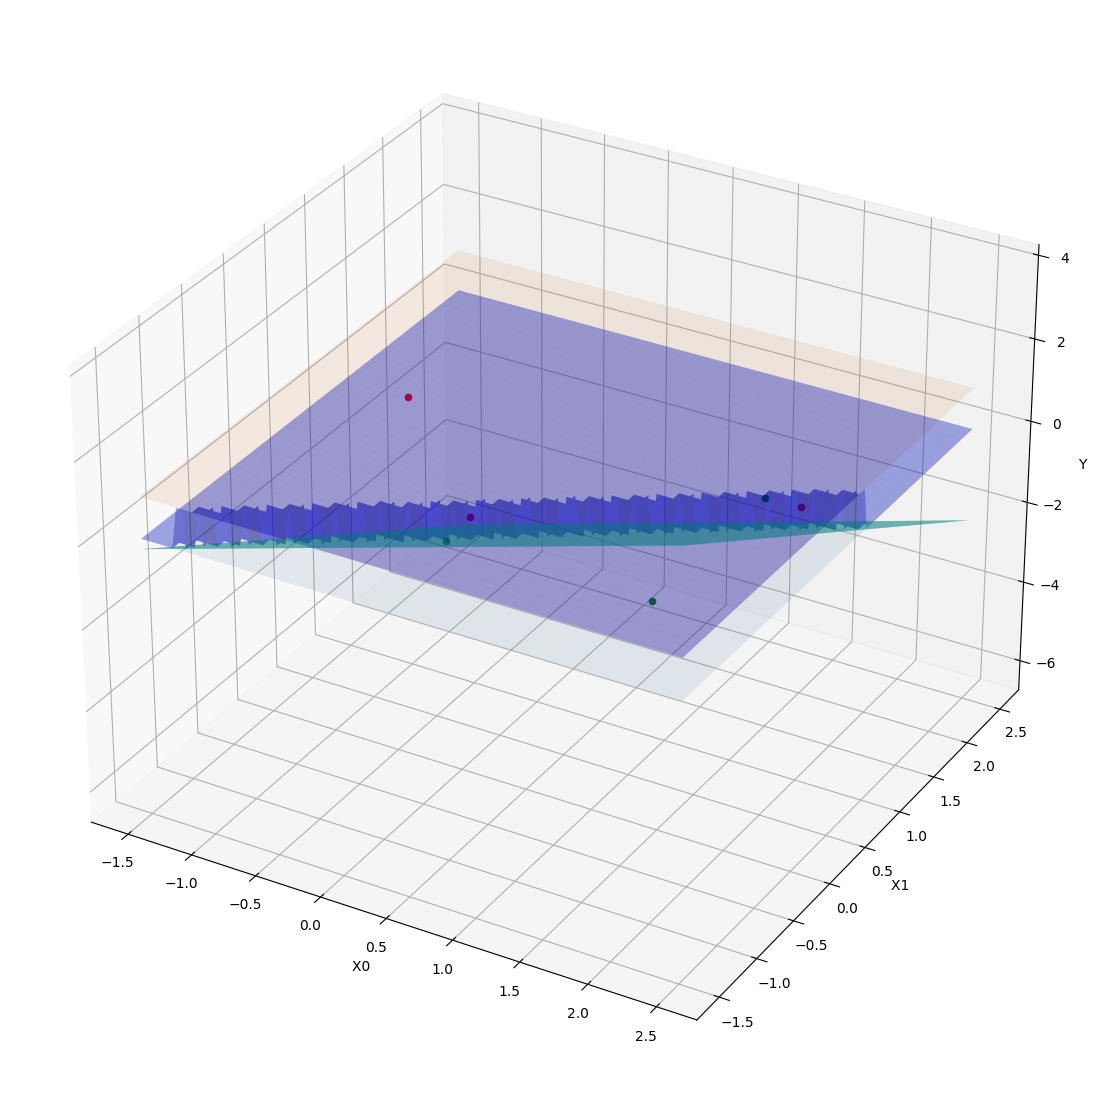

In [ ]:
import jax
import jax.numpy as jnp

X = np.array([[2,-1], [-1, 1], [2, 0.5], [0.2, -0.2], [0.5, -1], [2, 1]])
Y = np.array([1, 0, 1, 0, 1, 0])

W = np.array([1., 0.])
b = np.array([0.])
# print(np.matmul(np.array([1, 2]), np.array([[1, 0],[0, 1], [3,5]])))
def perceptron(x, w, b) -> float:
    return x[0]*w[0] + x[1]*w[1] + b


def train(x, y, w, b, eta, epochs=5000):
    for epoch in range(epochs):
        miss_classification = 0.

        for i in range(len(y)):
            y_pred = 1 if perceptron(x[i], w, b)>0 else 0
            w[0] += eta * (y[i] - y_pred)*x[i][0]
            w[1] += eta * (y[i] - y_pred)*x[i][1]
            b += eta * (y[i] - y_pred)

            miss_classification += abs(y_pred - y[i])

        if miss_classification == 0:
            print('0 loss found in ', epoch, ' iterations')
            break
    print('loss = ', miss_classification)
    return w, b

eta = 0.5
trained_W, trained_b = train(X, Y, W, b, eta)

fig = plt.figure(figsize =(14, 14))
ax = plt.axes(projection ='3d')


def class_perceptron(x, w, b) -> float:
    val = perceptron(x, w, b)[0]
    if val > 0:
        val = 1
    elif val < 0:
        val = 0
    return np.array([val])

x_0, x_1 = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1.5, 2.5, 100))
out = np.array([perceptron(np.array([x,y]), trained_W, trained_b) for x,y in zip(np.ravel(x_0),np.ravel(x_1))])
out = out.reshape(x_0.shape)

out2 = np.array([class_perceptron(np.array([x,y]), trained_W, trained_b) for x,y in zip(np.ravel(x_0),np.ravel(x_1))])
out2 = out2.reshape(x_0.shape)

ax.set_xlabel('X0 ')
ax.set_ylabel('X1 ')
ax.set_zlabel('Y ')


ax.plot_surface(x_0, x_1, out, alpha=0.7, color='c')
ax.plot_surface(x_0, x_1, np.zeros((1, len(x_0))), alpha=0.1)
ax.plot_surface(x_0, x_1, np.ones((1, len(x_0))), alpha=0.1)
ax.plot_surface(x_0, x_1, out2, alpha=0.3, color='blue')

for i in range(len(Y)):
    if Y[i] == 0:
        ax.scatter(X[i,0], X[i,1], Y[i], c='red', alpha=1)
    else:
        ax.scatter(X[i,0], X[i,1], Y[i], c='green')

plt.show()

Is it possible to represent in 2D the division between the two areas.

The representation will be on the x0 - x1 plane.

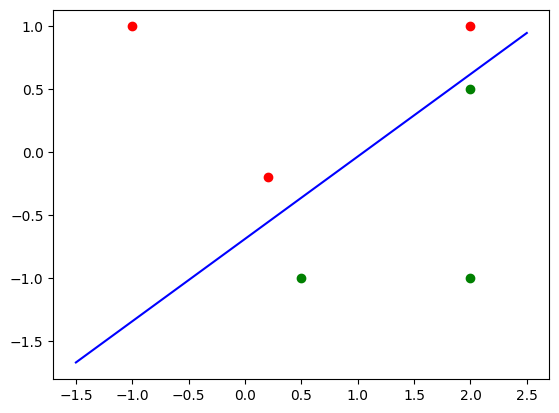

In [ ]:
def get_line(x0, w, b):
    return -w[0]/w[1] * x0 - b/w[1]

x_range = np.linspace(-1.5, 2.5, 100)
plt.scatter(x1_true, x2_true, c='green')
plt.scatter(x1_false, x2_false, c='red')
plt.plot(x_range, get_line(x_range, trained_W, trained_b), color='blue')
plt.plot()
plt.show()

# Esercizio 3


1. Show that the output of the softmax function does not change if you shift, in all components, the activations $a_j$ by some constant $c$.

  Now, let's consider the case where we shift all $a_j$ by a constant $c$:

  $softmax(a_j + c)$

  We want to show that this expression is equal to the original softmax function. Let's go through the steps:
*   Express $exp(a_k + c)$ in terms of $exp(a_k)$:

  $exp(a_k + c) = exp(c)\cdot exp(a_k)$

*    Substitute $exp(a_k + c)$ back into the softmax function:

  $\text{softmax}(a_k + c) = \frac{\exp(c) \cdot \exp(a_k)}{\exp(c) \cdot \sum_j \exp(a_j)}$
*   Cancel out $exp(c)$ from the numerator and denominator:

  $\text{softmax}(a_k + c) = \frac{\exp(a_k)}{\sum_j \exp(a_j)}$

  This shows that the expression for $softmax(a_j + c)$ is equivalent to the original softmax function. Therefore, shifting all components of the activations $a_j$ by a constant $c$ does not change the output of the softmax function.






2. Explain why the shift $c = - max_j(a_j)$ can be useful.

- When working with exponentials, especially in the softmax function, large or small values can result in numerical instability. The shift $c = - max_j(a_j)$ ensures that the largest exponentiated term becomes 0, and all other terms are exponentiated with negative values. This prevents overflow or extremely small numbers.

- The choice of $c = - max_j(a_j)$ ensures that the maximum term in the exponentiation is 0, simplifying calculations.